# Machine Learning #

## 基本术语

1. Data set(数据集):

    是一个关于sample, instance 的集合

2. Instance(示例), Sample(样本):

    是关于某一个对象的描述, 含有多种attribute(属性) 和attribute value(属性值)

3. attribute(属性), attribute value(属性值):
    
    是反映sample在某一方面的性质以及取值

4. attribute space(属性空间), sample space(样本空间, 输入空间):
    
    某个sample的attributes张成的空间
   

5. dimensionality(维数):

    sample 的attributes个数

6. hypothesis(假设), training set(训练集):

    对于用来训练模型的数据称作training set, 
    对于sample set的train所得的关于数据的某种潜在的规律, 为逼近ground-truth(真相)叫假设

7. example(样例):
    
    对于sample, 加入label(标记)表示结果的整体

8. label space(标记空间, 输出空间):
    
    sample 与 label相对应形成的examples所张成的空间

9. classification(分类):

    想要predict的值为离散的, 如0,1,2 称为classification

10. regression(回归):

    想要predict的值为连续值的

11. binary classification(二分类):

    classification的值只有两个时称作binary classification

12. positive class(正类), negative class(负类, 反类):

    binary classification中所设计的两个类分别称作此

13. testing(测试), testing sample(测试样本):

    得到predict模型后进行的测试

14. clustering(聚类):
    
    将training set 中的数据分为若干组, 每组称作一个cluster(簇), 在clustering learning中, 将这些自动形成的cluster自动寻找特性并产生相应的label

15. supervised learning(监督学习), unsupervised learning(无监督学习):

    classification 与 regression是supervised的代表, clustering是unsupervised的代表

16. generalization(泛化):

    学得模型适用于新的sample的能力

17. hypothesis space(假设空间), version space(版本空间):

    潜在规律形成的hypothesis张成的空间叫hypothesis space, 从该空间中删除与正例不一致的, 或者与反例相同的hypothesis剩下的子空间称作version space

18. inductive bias(归纳偏好):

    version space 中对于多个hypothesis均与label一致的情况, 需要采取何种hypothesis来确定某一个sample是否符合label, 称作inductive bias, 任何模型必须有bias

19. No Free Lunch Theorem(NFT定理):

    算法不论是什么样的, 期望值均相同, 必须针对相对应的具体问题选择具体的算法. 
    
    有严格证明

20. learner(学习器):

    模型, 学习算法在给定数据和参数空间的实例化

---

## supervised监督学习

* regression回归问题

用于预测随着attribute变化而连续变化的取值label问题

* classification分类问题

用于预测随着attribute变化而变化的离散取值label问题

---

## unsupervised无监督学习 - 找到数据的结构

* clustering聚类学习

将attribute相对集中分布的samples的label分为一个cluster簇, 从而将dataset分为不同label's cluster的set, 预测新加入的sample属于哪一个cluster

## 模型评估与选择

* overfitting(过拟合), underfitting(欠拟合):

    overfitting是将模型训练太过, 将training set里面的独有特征学习当作所有sample均具有的attribute, 训练模型难以避免.
    
    underfitting是模型训练不够, 难以抓住sample的attribute

* empirical error(经验误差), generalization error(泛化误差):
    
    在training set里预测产生的误差叫empirical error 在新的samples中产生的误差叫generalization error.
        

 ###   模型评估常用方法

>1. #### hold-out(留出法)

  将data set  $D$ 划分为两个互斥的集合, 一个用作training set  $S$ 另一个用作testing set  $T$ 且$D = S\cup T$ , $S\cap T = \emptyset$, 在$S$中训练, 在$T$中测试, 用于评估generalization error. 将大约 $2/3\sim 4/5$ 的data set用做训练, 剩余用做评估. 而training set最少要留出30个sample

  另外为确保不受选取set随机性的影响, 要进行多次不同划分进行训练

>2. #### cross validation(交叉验证法)

  将 $D$ 划分为 $k$ 个大小相似的互斥子集, 即$D = D_1\cup D_2\cup \cdots \cup D_k$ ,$D_i\cap D_j = \emptyset (i \neq j)$. 每个子集均是从data set里面均匀得到(分层抽样), 使用 $k-1$ 个子集进行训练, 1个子集进行评估. 并轮流使用不同的 $D_k$ 作为评估子集, 一共进行$k$轮训练.

* $ Leave-One-Out(LOO,留一法)$:

任意训练子集$D_i$只含有一个sample, 即训练时训练 总数-1 的sample, 留下一个单独的sample用于评估, 并轮次进行 总数 次.

>3. #### bootstrapping(自助法)

* 适用于data set 比较小的情况

  从给定的$m$个sample的$D$中每次随机复制一个sample到$D^{\prime}$中, 重复执行$m$次. 其中, $D^{\prime}$中的sample可能会出现多次, 也可能完全不出现, 完全不出现的概率为$${\lim_{m\to \infty}}(1-\frac {1}{m})^m = \frac{1}{e}\approx 0.368$$ 即有$36.8 \% $的数据完全不会出现在$D^{\prime}$中, 故我们可以将$D^{\prime}$作为training set 而将$D-D^{\prime}$作为评估用. 

### 查全率,查准率,F1

 * binary classification中真实情况与预测情况的情形

>|真实\预测|正例|反例|
|---|---|---|
|正例|TP(真正例)|FN(假反例)|
|反例|FP(假正例)|TN(真反例)|

 >以预测结果作为第二个PN选项, 预测为真就是P(positive), 假为N(negative), 再与真实情况比较, 如果与真实情况的真假相对应, 则为T(true), 相反为F(false)

* 查全率, 查准率

> 查准率(precision)定义为 $P = \frac{TP}{TP+FP}$ 所有预测正例里面的真情况

> 查全率(recall)定义为$R = \frac{TP}{TP+FN}$ 所有真实正例里面的预测为正情况

> 两者是相互矛盾的构象, 一个高另一个就低, 可以使用以recall为横轴, precision为纵轴的$P-R$图像. 以面积作为衡量标准.

>* $Break-Event Point(BEP,平衡点)$

>>面积难以计算时, 采用一条$y = x$直线分割图像, 此时直线意义为$precision = recall$, 以此直线与图像相交的点大小作为衡量标准

* $F1$

>$F1 = \frac{2\times P \times R}{P + R} = \frac{2\times TP}{sample总数+TP-TN}$

>$F1$是基于调和平均的, 原始定义为$\frac{1}{F1} = \frac{1}{2} \cdot (\frac{1}{P}+\frac{1}{R})$

>$F_{\beta}$是$F1$加权调和平均, $\frac{1}{F_{\beta}} = \frac{1}{2} \cdot (\frac{1}{P}+\frac{\beta^2}{R})$, 反解得到$$F_{\beta} = \frac{(1+\beta^2)\times P \times R}{(\beta^2\times P) + R}$$实际使用中, $\beta >1$时recall更重要, $\beta  = 1$时退化为标准$F1$, $\beta <1$时precision更重要

>* $n$个binary classification混淆矩阵判断法
>>* macro-$F1$(宏$F1$)
>>>相当于将所有子binary classification的precision, recall 求平均得到 macro-$P$和macro-$R$后, 再计算macro-$F1$
>>* micro-$F1$(微$F1$)
>>>相当于先求TP,TN,FP,FN的平均, 再计算得到micro-$P$与micro-$R$, 然后计算micro-$F1$

### ROC & AUC

* ROC(Receiver Operating Characteristic, 受试者工作特征)
>根据学习器预测结果对样例进行排序, 按此计算True Positive Rate(真正例率)$TPR = \frac{TP}{TP+FN}$(真实情况正例中,预测为真情况), 和False Positive Rate(假正例率)$FPR = \frac{FP}{TN+FP}$(真实情况反例情况下, 预测为真情况). 以$TPR$为纵轴, $FPR$为横轴.得到ROC图像

* AUC(Area Under ROC Curve)
>ROC曲线图中在ROC曲线以下部分的面积.

### 代价敏感错误率与代价曲线

### 比较检验

### 假设检验

### 交叉验证t检验

### McNemar检验


### Friedman 与 Nemenyi后续检验

### 偏差与方差

---

## 线性模型

将$d$个attributes描述的实例$\textbf{x} = (x_1,x_2,\cdots ,x_d)$通过一个对attributes的线性组合来预测的函数$$f(\textbf{x}) =w_1x_1+w_2x_2+\cdots +w_dx_d+b $$ 通过确定$\textbf{W} = (w_1,w_2,\cdots ,w_d)$与$b$即可确定模型

### 线性回归

使用均方误差衡量损失, 其中,$y$表示真实函数值, $X$表示数据集张量,其中$x_{ij}$中, $i$表示sample的序列(行数为sample个数),$j$为attribute序列(列数为attributes个数),$X$的最后一列全为1以便同$b$对应, 将$w$和$b$合并为同一组向量$\hat w = (\textbf{w},b)$,$X\hat w$表示模型预测结果 则所需的参数就是使得均方误差最小的$\hat w$, 均方误差:$$S = (y - X\hat w)^T(y - X\hat w)$$

要求最值, 则可对均方误差求梯度gradient并令其等于零, 即$$\nabla S(\hat w) = 2X^T(X\hat w - y) == 0$$

解之, 即得$$\hat w^* = (X^TX)^{-1}X^Ty$$

设预测时属性向量为$x$, 则最终预测结果为$$f(x) = x^T\hat w^* = x^T(X^TX)^{-1}X^Ty $$

而现实中, $X^TX$可能非满秩, 即样本的attributes数量(列数)远多于样本数(行数), 故其解空间非零维, 则此时, 选择哪一个解向量作为输出, 取决于算法的归纳偏好, 常见的做法是引入regularization(正则化)项

In [5]:
import numpy as np

X = np.random.random(size=(4,3)) #创建input数组
X = np.hstack((X,np.array([[1],[1],[1],[1]]))) #扩充X使之兼容(w,b)
w = np.random.random(size=4) #创建w = (w,b)
y = np.array([1,2,3,4]) #指定y

# s = ((y-X.dot(w))**2).sum() #计算均方误差

X = np.matrix(X) # 将X转化为矩阵形式, 便于求inv以及转置

w_sol = ((X.T.dot(X)).I).dot(X.T).dot(y) #梯度求解, 得到均方误差损失下最佳的weight(或者使用@代替.dot)
print (w_sol)


[[ 4.40089155  3.03708158  1.25926826 -3.20078109]]


---

## 决策树

decision tree是一类常见的机器学习算法

对数据集属性集$x$和label集$y$, 通过纯度算法, 从对于纯度贡献最大的属性开始决策, 最终得到一个决策树

![decision tree](decision_tree.jpg)

In [ ]:
# -*- coding: UTF-8 -*-
from math import log
import operator
 
 
 
"""
函数说明:创建测试数据集
"""
def createDataSet():
    dataSet = [[0, 0, 0, 0, 'no'],         #数据集
               [0, 0, 0, 1, 'no'],
               [0, 1, 0, 1, 'yes'],
               [0, 1, 1, 0, 'yes'],
               [0, 0, 0, 0, 'no'],
               [1, 0, 0, 0, 'no'],
               [1, 0, 0, 1, 'no'],
               [1, 1, 1, 1, 'yes'],
               [1, 0, 1, 2, 'yes'],
               [1, 0, 1, 2, 'yes'],
               [2, 0, 1, 2, 'yes'],
               [2, 0, 1, 1, 'yes'],
               [2, 1, 0, 1, 'yes'],
               [2, 1, 0, 2, 'yes'],
               [2, 0, 0, 0, 'no']]
    labels = ['年龄', '有工作', '有自己的房子', '信贷情况']        #分类属性
    return dataSet, labels                           #返回数据集和分类属性
 
 
"""
函数说明:计算给定数据集的经验熵(香农熵)
Parameters:
    dataSet - 数据集
Returns:
    shannonEnt - 经验熵(香农熵)
"""
def calcShannonEnt(dataSet):
    numEntires = len(dataSet)                        #返回数据集的行数
    labelCounts = {}                                 #保存每个标签(Label)出现次数的字典
    for featVec in dataSet:                          #对每组特征向量进行统计
        currentLabel = featVec[-1]                   #提取标签(Label)信息
        if currentLabel not in labelCounts.keys():   #如果标签(Label)没有放入统计次数的字典,添加进去
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1               #Label计数
    shannonEnt = 0.0                                 #经验熵(香农熵)
    for key in labelCounts:                          #计算香农熵
        prob = float(labelCounts[key]) / numEntires  #选择该标签(Label)的概率
        shannonEnt -= prob * log(prob, 2)            #利用公式计算
    return shannonEnt                                #返回经验熵(香农熵)
 
 
"""
函数说明:按照给定特征划分数据集
Parameters:
    dataSet - 待划分的数据集
    axis - 划分数据集的特征
    value - 需要返回的特征的值
"""
def splitDataSet(dataSet, axis, value):
    retDataSet = []                                     #创建返回的数据集列表
    for featVec in dataSet:                             #遍历数据集
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]             #去掉axis特征
            reducedFeatVec.extend(featVec[axis+1:])     #将符合条件的添加到返回的数据集
            retDataSet.append(reducedFeatVec)
    return retDataSet                                   #返回划分后的数据集
 
 
"""
函数说明:选择最优特征
Parameters:
    dataSet - 数据集
Returns:
    bestFeature - 信息增益最大的(最优)特征的索引值
"""
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1                     #特征数量
    baseEntropy = calcShannonEnt(dataSet)                 #计算数据集的香农熵
    bestInfoGain = 0.0                                    #信息增益
    bestFeature = -1                                      #最优特征的索引值
    for i in range(numFeatures):                          #遍历所有特征
        #获取dataSet的第i个所有特征
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)                         #创建set集合{},元素不可重复
        newEntropy = 0.0                                   #经验条件熵
        for value in uniqueVals:                           #计算信息增益
            subDataSet = splitDataSet(dataSet, i, value)           #subDataSet划分后的子集
            prob = len(subDataSet) / float(len(dataSet))           #计算子集的概率
            newEntropy += prob * calcShannonEnt(subDataSet)        #根据公式计算经验条件熵
        infoGain = baseEntropy - newEntropy                        #信息增益
        print("第%d个特征的增益为%.3f" % (i, infoGain))             #打印每个特征的信息增益
        if (infoGain > bestInfoGain):                              #计算信息增益
            bestInfoGain = infoGain                                #更新信息增益，找到最大的信息增益
            bestFeature = i                                        #记录信息增益最大的特征的索引值
    return bestFeature                                             #返回信息增益最大的特征的索引值
 

"""
函数说明:统计classList中出现此处最多的元素(类标签)
Parameters:
    classList - 类标签列表
Returns:
    sortedClassCount[0][0] - 出现此处最多的元素(类标签)
"""
def majorityCnt(classList):
    classCount = {}
    for vote in classList:                                        #统计classList中每个元素出现的次数
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)        #根据字典的值降序排序
    return sortedClassCount[0][0]                                #返回classList中出现次数最多的元素
 
 
"""
函数说明:递归构建决策树
Parameters:
    dataSet - 训练数据集
    labels - 分类属性标签
    featLabels - 存储选择的最优特征标签
Returns:
    myTree - 决策树
"""
def createTree(dataSet, labels, featLabels):
    classList = [example[-1] for example in dataSet]               #取分类标签(是否放贷:yes or no)
    if classList.count(classList[0]) == len(classList):            #如果类别完全相同则停止继续划分
        return classList[0]
    if len(dataSet[0]) == 1:                                       #遍历完所有特征时返回出现次数最多的类标签
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)                   #选择最优特征
    bestFeatLabel = labels[bestFeat]                               #最优特征的标签
    featLabels.append(bestFeatLabel)
    myTree = {bestFeatLabel:{}}                                    #根据最优特征的标签生成树
    del(labels[bestFeat])                                          #删除已经使用特征标签
    featValues = [example[bestFeat] for example in dataSet]        #得到训练集中所有最优特征的属性值
    uniqueVals = set(featValues)                                   #去掉重复的属性值
    for value in uniqueVals:
        subLabels=labels[:]
        #递归调用函数createTree(),遍历特征，创建决策树。
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels, featLabels)
    return myTree
 
 
"""
函数说明:使用决策树执行分类
Parameters:
    inputTree - 已经生成的决策树
    featLabels - 存储选择的最优特征标签
    testVec - 测试数据列表，顺序对应最优特征标签
Returns:
    classLabel - 分类结果
"""
def classify(inputTree, featLabels, testVec):
    firstStr = next(iter(inputTree))             #获取决策树结点
    secondDict = inputTree[firstStr]             #下一个字典
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel
 
 
if __name__ == '__main__':
    dataSet, labels = createDataSet()
    featLabels = []
    myTree = createTree(dataSet, labels, featLabels)
    print(myTree)
    testVec = [0, 1]     # 测试数据
    result = classify(myTree, featLabels, testVec)
    if result == 'yes':
        print('放贷')
    if result == 'no':
        print('不放贷')

此算法实质上是:

计算所有属性的信息增益,找出最大的信息增益属性

对于此属性的所有属性取值:

{如果 在此属性取值下的数据集为空, 那么划分前的数据集中最多的label就是叶节点取值

如果 不为空, 那么 在划分后的数据集中去掉这个属性, 在剩下的属性中选择信息增益最大的重复此过程}


>---

下列为进入递归后 递归停止情况:

如果 在递归过程中, 存在一个属性取值, 在此属性取值下的数据集label均属于同一类, 则此叶节点取值就是这个label


如果 递归过程中, 没有其他属性, 或者 在这些属性上, 所有样本取值均相同, 则在现在的数据集中label最多的那一类就是 叶节点取值

---

## Neural Networks

#### M-P神经元模型

类似于一个函数, 接受很多的inputs 每一个input对应着一个权重weight, 这个神经元实质上是:

一个激活函数$$f(\sum_{i=1}^n w_ix_i - \theta)$$ 他的自变量是$\vec{w^T}\vec x$与bias偏置 $\theta$的线性组合, 得到一个输出传送给下一层神经元, 作为下一层神经元输入$\vec x$其中的一个分量

#### 激活函数

* Sigmoid $$f(x) = \frac {1}{1 + e^{-x}}$$具有极好的求导性质, $y^{\prime} = y(1-y)$

* ReLU $$$$
分段函数, 在阈值$x_0$左边的值恒取值为零, 在右边的值输出原值, 一般阈值为0

* $and\ others$

#### Perceptron感知机

由两层神经元组成, 一层为输入层, 一层为输出层, 输入层的neurons(神经元们)通过赋予一定权重的输出们$x_i$交给下一层神经元处理, 下一层神经元在此基础上通过激活函数产生自己的输出$y$, 下一层neuron在处理数据的时候还会有bias

* 感知机权重的调整$$$$
存在一个learning rate学习率$\eta $, 由此来更新每个权重$w_i$ $$更新后的权重w_i = 原权重w_i + \Delta w_i$$ $$\Delta w_i = \eta (y - \hat y)x_i$$其中, $y$是label, $\hat y$是感知机预测的结果

* Perceptron的局限$$$$
只有两层的感知机没有办法处理非线性问题, 只能够使用一个超平面分割正例反例, 对于非线性划分没有办法. 可通过多层perceptron的组合形成hidden layer隐藏层来产生非线性分割

#### error BackPropagation 误差反向传播算法(BP算法)

BP算法基于gradient descent梯度下降策略, 对于以权重为自变量的损失函数$E = Loss(\vec w)$, 要想找到Loss函数的最小值, 根据多元微分学, 梯度为零的驻点, 有可能是最小值点. 而沿着任意一点的梯度的反方向就是Loss下降最快的方向, 由此, 权重更新中的$$\Delta w_i = -\eta \frac{\partial E}{\partial w_i}$$

Loss函数对权重$w$的梯度, 可由神经元输出$\hat y$, 对此神经元的输入$\beta$组成链导法则:
$$\frac{\partial E}{\partial w} = \frac{\partial E}{\partial {\hat y}}\frac {\partial {\hat y}}{\partial \beta}\frac {\partial \beta}{\partial w}$$其中,设前一层神经元的输出为$b$,则$$\frac {\partial \beta}{\partial w} = b$$ $\beta = \vec w^T\vec b$, 可由此链导法则的到精确的前一层神经元的每一个输出, 以用来调节这一层到更前一层的权重参数

-----------调参前-----------
参数: 
[[0.2, 0.6], [0.1, 0.2]]
[0.2, 0.8]
损失: 
[0.00970533]


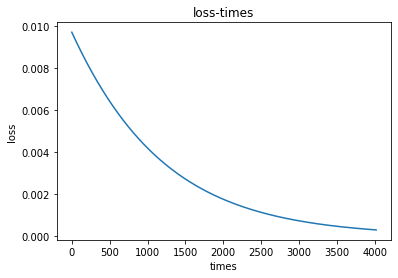

-----------调参后-----------
历经 4021 轮后:
参数: 
[[0.16649323 0.57185484]
 [0.00672452 0.12164957]]
[-0.21758047  0.44922848]
损失: 
[0.00029984]


In [2]:
import matplotlib.pyplot as plt
import numpy as np

class Network():

    def __init__(self,input,w1,w2,output,learning_rate):
        self.w1 = np.array(w1)
        self.w2 = np.array(w2)
        self.input = np.array(input) 
        self.output = np.array(output)
        self.lr = learning_rate
    
    def neuron(self,input): #指定神经元的激活函数
        out = 1/(1 + np.exp(-1 * input))
        return out

    def forward(self): #前向算法, 只有三层, 输入-隐含-输出
        to_hidden = self.w1 @ self.input
        out_hidden = Network.neuron(self,to_hidden)
        to_output = self.w2 @ out_hidden
        output = Network.neuron(self,to_output)
        return output

    def delta_w2(self): #调参使用的从输出层到隐含层的
        hat_y = Network.forward(self)
        to_hidden = self.w1 @ self.input
        beta = Network.neuron(self,to_hidden)
        partial_E_w2 = (hat_y - self.output) * (1 - hat_y) * hat_y * beta
        deltaw2 = -1 * self.lr * partial_E_w2
        deltaw2 = np.reshape(deltaw2,2)
        return deltaw2

    def delta_w1(self): #调参使用的从隐含层到输入层的
        partial_E_w2 = Network.delta_w2(self) * -1/self.lr
        to_hidden = self.w1 @ self.input
        beta = Network.neuron(self,to_hidden)
        deltaw1 = -1 * self.lr * partial_E_w2 * beta * (1 - beta) * self.input
        return deltaw1

    def backward(self):#反向传播调参
        self.w2 += Network.delta_w2(self)
        self.w1 += Network.delta_w1(self)
    
    def loss(self):
        hat_y = Network.forward(self)
        loss = 0.5 * (hat_y - self.output)**2
        return loss

input = [[0.35],[0.9]]
output = 0.5

w1_o = [[0.2,0.6],[0.1,0.2]]
w2_o = [0.2,0.8]

net = Network(input,w1_o,w2_o,output,learning_rate=0.01)
print('{:-^25}'.format('调参前'))
print('参数: ')
print(w1_o)
print(w2_o)
print('损失: ')
print(net.loss())
y = []
while 1 :
    net.backward()
    y.append(net.loss())
    if net.loss() <= 0.0003:
        break
x = range(len(y))
plt.xlabel('times')
plt.ylabel('loss')
plt.title('loss-times')
plt.plot(x,y)
plt.show()
print('{:-^25}'.format('调参后'))
print(f'历经 {len(y)} 轮后:')
print('参数: ')
print(net.w1)
print(net.w2)
print('损失: ')
print(net.loss())

---

## Support Vector Machine支持向量机(SVM)

给定一个样本集, 其中属性维度有$m$维, 共有$d$个样本. label为$y$, 则此数据集可表示为$$D = \{(\vec x_1, y_1),(\vec x_2,y_2),\cdots (\vec x_d, y_d)\}$$其中, $\vec x_i = [x_1,x_2,x_3,\cdots ,x_m]$, 则通过机器学习, 有可能寻找到一个$m$维超平面(取决于数据集是否线性可分)$$\vec w^T\vec x + b = 0$$将数据集根据label的不同从而分到超平面的两侧, 其中$\vec w = [w_1,w_2,\cdots ,w_m]$为超平面的法向量, $b$为超平面距原点的距离.

对于一个二维的划分而言:

![2D_SVM](2d_SVM.jpg)

$H$即为超平面, 样本空间内任意样本到超平面的距离为(类比于空间点到平面距离)$$r = \frac{|\vec w^T\vec x + b|}{||\vec w||}$$

support vector所在平面方程为$\vec w^T \vec x + b = \pm c$, 若将决策超平面式子: $\vec w^T \vec x + b = 0$和support vector所在的边界超平面方程同时左右同时除以$c$, 则令$$\frac {\vec w}{c} = \vec w^{\prime}$$$$\frac {b}{c} = b^{\prime}$$可得到($y$为正负类取值)

$$\left\{
\begin{aligned}
\vec w^{\prime T}\vec x + b^{\prime} \ge +1,& \quad y = +1 \\
\vec w^{\prime T}\vec x + b^{\prime} \le -1,& \quad y = -1 
\end{aligned}
\right.
$$

而在此替换后的结果上, 若将$\vec w^{\prime}$和$b^{\prime}$替换为$w$, $b$仍不影响运算, 故将之全部替换

而在此边界上的样本, 使得上式的等号成立, 故将这些样本点分别称作Support Vector(支持向量)

两个不同的label的support vector到超平面距离之和为(因为其满足超平面上的点到这个扩张后的超平面距离中的$\vec w^Tx + b = 0$): $$\gamma = \frac{2}{||\vec w||}$$它被称作margin(间隔)

如果能够使得$\gamma$最大, 那么超平面划分后的模型对于噪音的扰动抗干扰能力最强. 故欲找到具有maximum margin(最大间隔)的划分超平面, 则需要找到最小的$||\vec w||$

故Support Vector Machine的基本型为: 

求解这样的一个$\vec w$满足
$$\underset{\vec w,b}{\min} \frac{1}{2}||\vec w||^2$$
$$s.t.\quad y_i(\vec w^T\vec x_i +b) \ge 1$$ $subject\ to$后的式子表示label与超平面同号且相乘大于一, 满足前大括号式子, 其中, $\vec x_i$, $y_i$为所有样本属性取值和label取值均有第二个式子成立

可以由此, 得到Lagrangrian函数为:$$L(\vec w,b,\lambda) = \frac{1}{2}||\vec w||^2 - \sum_{i=1}^{d}\lambda _i[y_i(\vec w^T\vec x_i+b)-1]$$

这个函数的KKT条件为:
$$
\left\{
\begin{aligned}
\lambda \ge 0 \\
y_i(\vec w^T\vec x_i + b)-1 \ge 0 \\
\lambda[y_i(\vec w^T\vec x_i + b)-1] = 0
\end{aligned}
\right.
$$

作为support vector, 由于其在约束条件边界上, 故$\lambda > 0$而$y_i(\vec w^T \vec x_i + b) - 1 = 0$即为$$y_if(\vec x_i) = 1$$

随后利用凸函数对偶问题最优化求解

#### Kernel Function核函数

---

## 贝叶斯分类器